In [159]:
import pandas as pd

In [160]:
data_set = pd.read_csv("Admission_Predict_Ver1.1.csv", sep=",")

In [161]:
data_set.shape
data_set.isnull().sum()
data_set.duplicated().sum()
data_set.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [162]:
data_set_x = data_set.iloc[:,1:8]
data_set_y = data_set.iloc[:,8]


In [108]:
data_set

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [109]:
import plotly.express as px

In [110]:
for title in data_set_x.columns:
    box_px = px.box(data_set_x, y=title)
    box_px.show()

In [111]:
import matplotlib.pyplot as plt

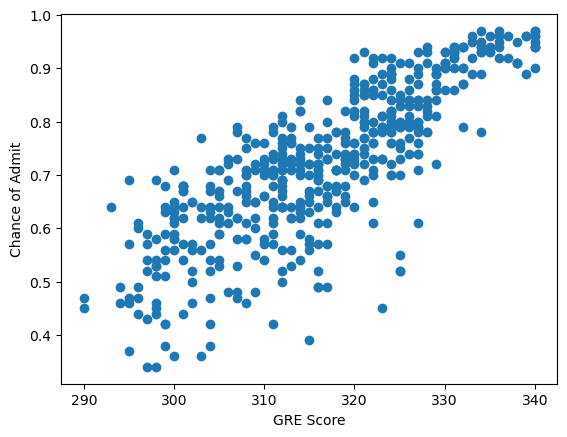

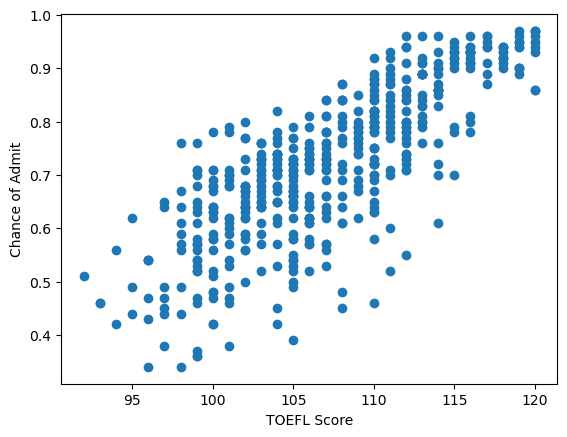

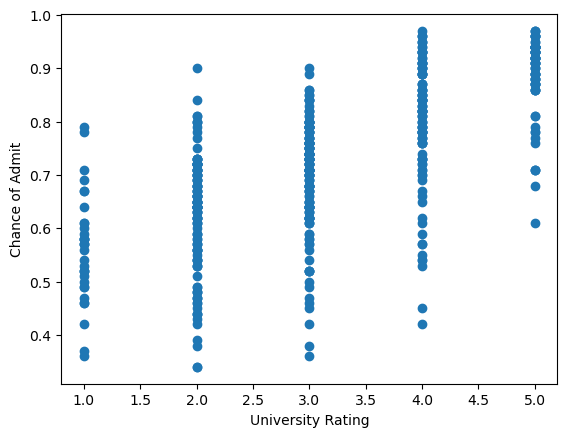

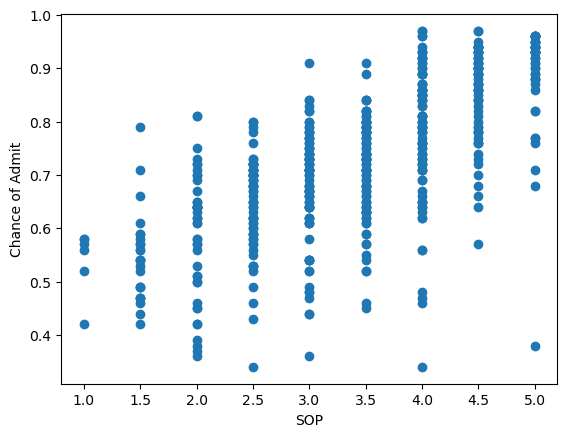

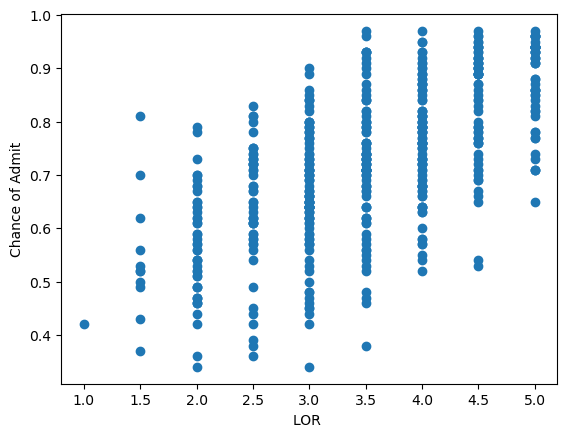

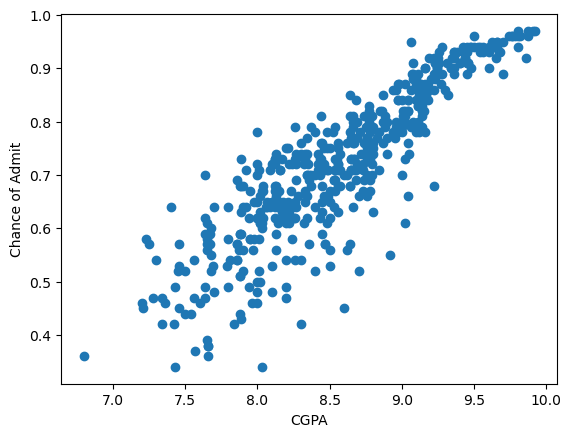

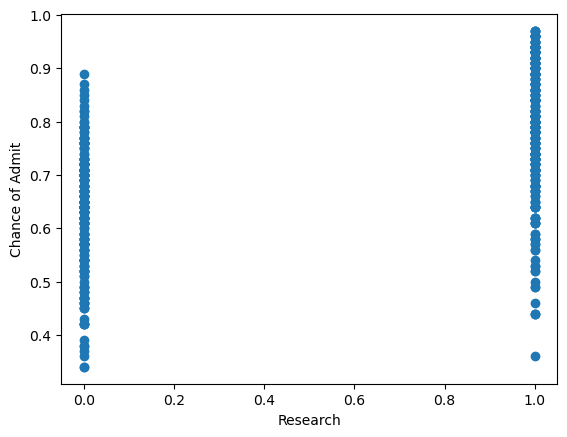

In [112]:
for title in data_set_x.columns:
    
    plt.scatter(data_set_x[title], data_set_y)
    plt.xlabel(title)
    plt.ylabel("Chance of Admit")
    plt.show()

In [113]:
import scipy.stats as stats
import plotly.express as px

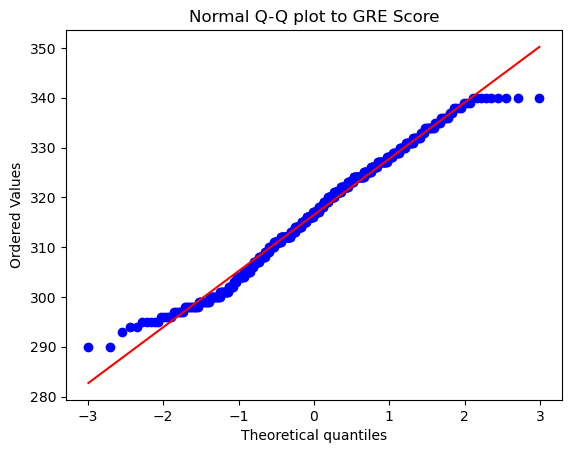

Estatística do teste: 0.9857423277772411
p-valor: 8.202210016135558e-05


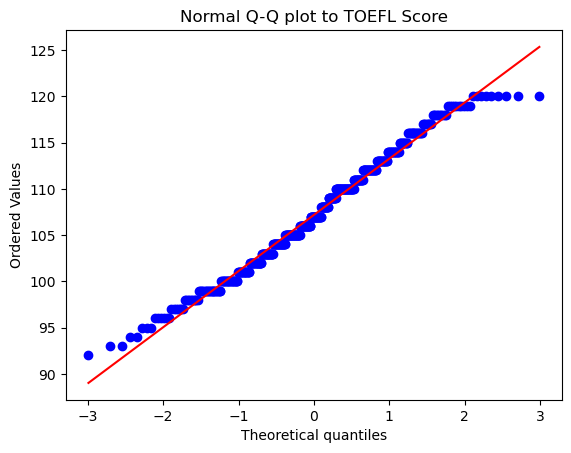

Estatística do teste: 0.9858326279517755
p-valor: 8.718714564805742e-05


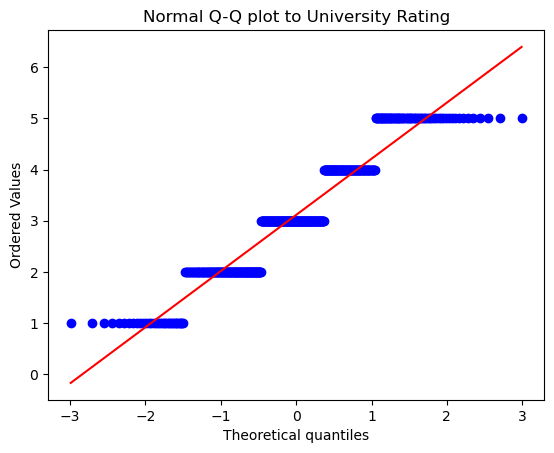

Estatística do teste: 0.9110997079586305
p-valor: 1.5632285000141346e-16


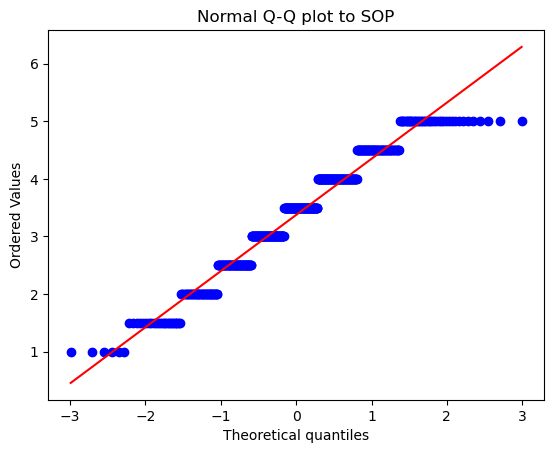

Estatística do teste: 0.9579648762695866
p-valor: 9.585164056230986e-11


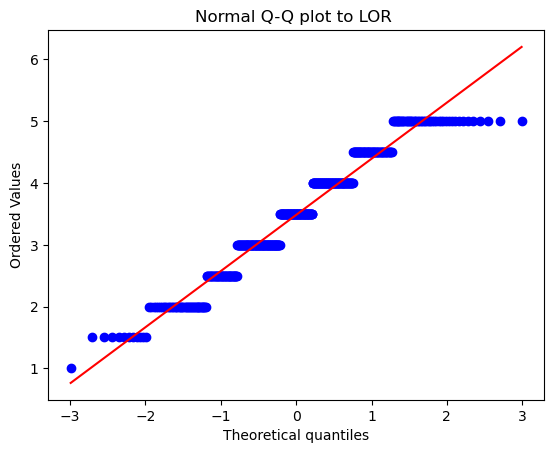

Estatística do teste: 0.954483085897669
p-valor: 2.7059773328644783e-11


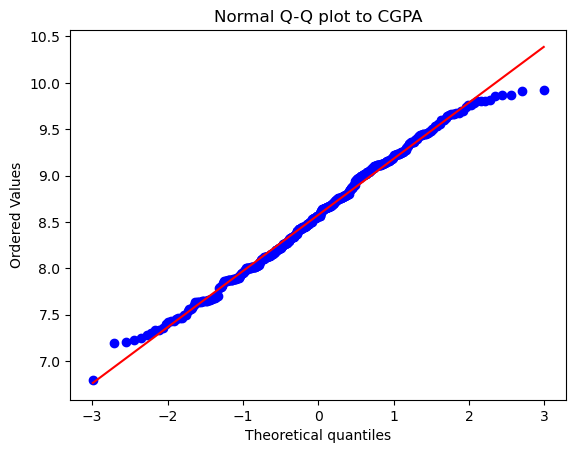

Estatística do teste: 0.9922096996498209
p-valor: 0.010282831994315006


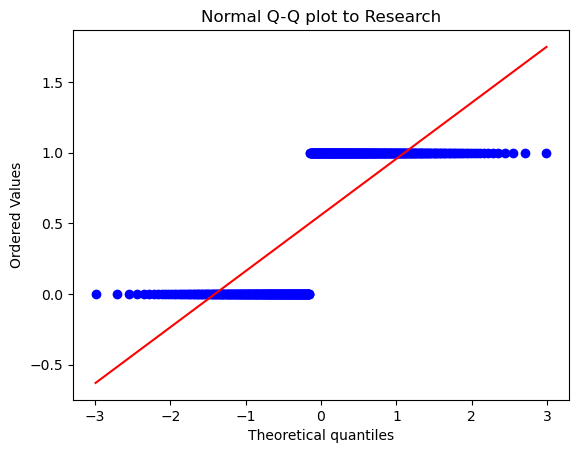

Estatística do teste: 0.6312852518348436
p-valor: 2.3750426589450496e-31


In [114]:
for title in data_set_x.columns:
    stats.probplot(data_set[title], dist="norm", plot=plt)
    plt.title(f'Normal Q-Q plot to {title}')
    plt.show()

    hist =  px.histogram (data_set,  x = title, nbins=60) 
    hist.update_layout(width=800,height=500,title_text=f'relationship between {title}') 
    hist.show()
    
    estatistica, p = stats.shapiro(data_set[title])
    print('Estatística do teste: {}'.format(estatistica))
    print('p-valor: {}'.format(p))

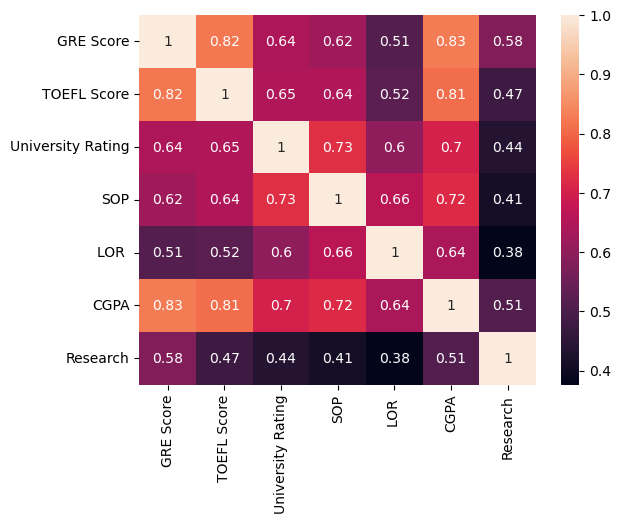

In [115]:
import seaborn as sns
correlacoes = data_set_x.corr(method='spearman')

plt.figure()
sns.heatmap(correlacoes, annot=True);

In [24]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

data_set_x_standed = StandardScaler().fit_transform(data_set_x)
data_set_x_standed

array([[ 1.81923762,  1.77886545,  0.77558214, ...,  1.09894429,
         1.77680627,  0.88640526],
       [ 0.66714832, -0.03160087,  0.77558214, ...,  1.09894429,
         0.48585943,  0.88640526],
       [-0.0418297 , -0.52536441, -0.09979274, ...,  0.01730621,
        -0.95404281,  0.88640526],
       ...,
       [ 1.19888185,  2.10804114,  1.65095702, ...,  1.63976333,
         1.62785086,  0.88640526],
       [-0.39631872, -0.68995225,  0.77558214, ...,  1.63976333,
        -0.24236699, -1.12815215],
       [ 0.93301508,  0.95592621,  0.77558214, ...,  1.09894429,
         0.76721964, -1.12815215]])

In [ ]:
import itertools
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import statsmodels.api as sm
from itertools import combinations
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(data_set_x, data_set_y, test_size=0.2, random_state=42)

all_combinations = []

for r in range(1, len(data_set_x.columns) + 1):

    comb = list(combinations(data_set_x.columns, r))

    all_combinations.extend(comb)

# Display the total number of combinations and the first few combinations as an example

len(all_combinations), all_combinations[:10]
all_combinationsfull = []

def find_best_combination(df):
  
    
    for comb in all_combinations:
    # Select the features for the current combination
        X_train_comb = X_train[list(comb)]
        X_test_comb = X_test[list(comb)]
        
        corr_matrix = X_train_comb.corr()
        # Taking the absolute value and excluding diagonal
        corr_values = corr_matrix.values[np.triu_indices_from(corr_matrix.values, k=1)]
        avg_corr = np.mean(np.abs(corr_values))
        
        model = LinearRegression()
        model.fit(X_train_comb, y_train)
        y_test_comb = model.predict(X_test_comb)
        
        r2 = r2_score(y_test, y_test_comb)

        
        all_combinationsfull.append((
            comb,
            avg_corr.round(2),
            r2
        ))
        

    return all_combinationsfull


all_combinationsfull = find_best_combination(data_set_x)
all_combinationsfull = pd.DataFrame(data=all_combinationsfull, columns=["columns", "avg_corr", "r2"])

In [10]:
all_combinationsfull = all_combinationsfull.sort_values(by="r2", ascending=False).reset_index(drop=True)
all_combinationsfull

,columns,avg_corr,r2
0,"(University Rating, LOR , CGPA, Research)",0.53,0.831289
1,"(University Rating, LOR , CGPA)",0.64,0.830960
2,"(University Rating, SOP, LOR , CGPA, Research)",0.57,0.830901
3,"(University Rating, SOP, LOR , CGPA)",0.67,0.830591
4,"(TOEFL Score, University Rating, SOP, LOR , CG...",0.58,0.828534
...,...,...,...
122,"(LOR , Research)",0.33,0.529959
123,"(University Rating,)",NaN,0.528972
124,"(LOR ,)",NaN,0.499858
125,"(SOP,)",NaN,0.483502


In [167]:
X_train, X_test, y_train, y_test = train_test_split(data_set_x, data_set_y, test_size=0.2, random_state=42)

# Performing feature selection using a regression model with recursive feature elimination
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

# Creating the linear regression model
model = LinearRegression()


In [168]:
# Using Recursive Feature Elimination (RFE) to select the best features
rfe = RFE(model, n_features_to_select=4)
rfe = rfe.fit(X_train, y_train)

# Getting the ranking of features
ranking = pd.DataFrame({'Feature': data_set_x.columns, 'Ranking': rfe.ranking_})
ranking.sort_values(by='Ranking')

,Feature,Ranking
1,TOEFL Score,1
4,LOR,1
5,CGPA,1
6,Research,1
2,University Rating,2
0,GRE Score,3
3,SOP,4


University Rating, LOR , CGPA, Research

In [151]:
data_set_x_chosen = data_set_x.iloc[:,[2,4,5,6]]
data_set_x_chosen

,University Rating,LOR,CGPA,Research
0,4,4.5,9.65,1
1,4,4.5,8.87,1
2,3,3.5,8.00,1
3,3,2.5,8.67,1
4,2,3.0,8.21,0
...,...,...,...,...
495,5,4.0,9.02,1
496,5,5.0,9.87,1
497,5,5.0,9.56,1
498,4,5.0,8.43,0


In [32]:
X_train_standed, X_test_standed, y_train_standed, y_test_standed = train_test_split(data_set_x_standed, data_set_y, test_size=0.2, random_state=42)

In [152]:
X_train, X_test, y_train, y_test = train_test_split(data_set_x_chosen, data_set_y, test_size=0.2, random_state=42)

In [146]:
from sklearn.svm import SVR
SVR2 = SVR(kernel='linear')
SVR2.fit(X_train_standed, y_train_standed.ravel())

/tmp/ipykernel_12324/2970084835.py:3: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  SVR2.fit(X_train_standed, y_train_standed.ravel())


SVR(kernel='linear')

In [147]:
SVR2.score(X_train_standed,y_train_standed.ravel())
SVR2.score(X_test_standed,y_test_standed.ravel())

/tmp/ipykernel_12324/3700229634.py:1: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  SVR2.score(X_train_standed,y_train_standed.ravel())
/tmp/ipykernel_12324/3700229634.py:2: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  SVR2.score(X_test_standed,y_test_standed.ravel())


0.7863474688770464

In [148]:
previsoes_teste = SVR2.predict(X_test_standed)
previsoes_teste

array([0.86934079, 0.76123677, 0.56098281, 0.68484522, 0.7816227 ,
       0.81791348, 0.47801711, 0.62531873, 0.78592107, 0.77583974,
       0.69099406, 0.70039542, 0.61717768, 0.88263964, 0.78279893,
       0.48903043, 0.78370386, 0.57258112, 0.51978802, 0.55991004,
       0.65318197, 0.53263214, 0.69015126, 0.75892473, 0.75017084,
       0.58065907, 0.91416844, 0.80583572, 0.61095356, 0.71738047,
       0.54306786, 0.70118384, 0.53821024, 0.82570513, 0.63270668,
       0.70836053, 0.53568083, 0.91643574, 0.6328215 , 0.69355391,
       0.91281713, 0.5542187 , 0.6390313 , 0.82408511, 0.87856693,
       0.55517527, 0.91594556, 0.79984684, 0.7493824 , 0.88655965,
       0.84353692, 0.55370105, 0.67844194, 0.51749327, 0.90942183,
       0.57408397, 0.90043128, 0.71577118, 0.64868642, 0.48693997,
       0.59285408, 0.65633579, 0.57696659, 0.57612747, 0.42699785,
       0.6004785 , 0.8321802 , 0.8525582 , 0.62762447, 0.6673229 ,
       0.59915115, 0.75317164, 0.64599175, 0.56088546, 0.53405

In [149]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [150]:
r2_scoree = r2_score(y_test_standed, previsoes_teste)
r2_scoree

0.7863474688770464

In [153]:
from sklearn.svm import SVR
SVR3 = SVR(kernel='linear')
SVR3.fit(X_train, y_train.ravel())

SVR3.score(X_train, y_train.ravel())


previsoes_teste2 = SVR3.predict(X_test)
previsoes_teste2

r2_scoree = r2_score(y_test, previsoes_teste2)
r2_scoree

/tmp/ipykernel_12324/3249721776.py:3: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  SVR3.fit(X_train, y_train.ravel())
/tmp/ipykernel_12324/3249721776.py:5: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  SVR3.score(X_train, y_train.ravel())


0.8217209753671323

In [75]:
from sklearn.ensemble import RandomForestRegressor

random = RandomForestRegressor(n_estimators=50, criterion='squared_error', max_depth=4, random_state = 10)
random.fit(X_train_standed, y_train_standed)

print(random.score(X_train_standed, y_train_standed))

print(random.score(X_test_standed, y_test_standed))

previsoes_teste = random.predict(X_test_standed)
print(previsoes_teste)

r2_scoree = r2_score(y_test_standed, previsoes_teste)
print(r2_scoree)

0.8561083557298291
0.8070190751898305
[0.93937492 0.78311842 0.59170308 0.70514734 0.79144412 0.8832739
 0.47907555 0.66056463 0.85023249 0.78340413 0.71783211 0.72280019
 0.66558977 0.9247502  0.86963624 0.52833097 0.81619887 0.5964927
 0.55323447 0.53246114 0.65386432 0.54188617 0.71165908 0.77363869
 0.75276107 0.61769619 0.93294471 0.82987762 0.65485039 0.71795225
 0.55174692 0.74395291 0.55789446 0.88526232 0.62144942 0.7246899
 0.55950818 0.93945048 0.63974633 0.69600993 0.9486762  0.52957861
 0.68080468 0.82789749 0.94042189 0.62246315 0.94096189 0.80262665
 0.76658695 0.92994674 0.91105161 0.54864421 0.68218579 0.47320223
 0.94096189 0.62486962 0.95088491 0.74830821 0.66283855 0.45765782
 0.63950693 0.68545701 0.62321857 0.56061276 0.46300569 0.58759542
 0.894267   0.8984843  0.67857239 0.71203216 0.60982942 0.76173289
 0.71099528 0.57608143 0.567667   0.65831313 0.81826992 0.8717277
 0.5153302  0.67619884 0.74377243 0.88242004 0.63996037 0.82414733
 0.72952304 0.63991589 0.629

In [123]:
from xgboost import XGBRegressor

xgboost = XGBRegressor(n_estimators=50, max_depth=2, learning_rate=0.2, objective="reg:squarederror", random_state=10)
xgboost.fit(X_train_standed, y_train_standed)

print(xgboost.score(X_train_standed, y_train_standed))

print(xgboost.score(X_test_standed, y_test_standed))

previsoes_teste = xgboost.predict(X_test_standed)
print(previsoes_teste)

r2_scoree = r2_score(y_test_standed, previsoes_teste)
print(r2_scoree)

0.8736151507949103
0.7995343064662405
[0.92854893 0.7678244  0.5876431  0.7072464  0.77418786 0.8822126
 0.48394632 0.64123744 0.84220934 0.7909137  0.71795917 0.7072464
 0.69178945 0.9389481  0.8637722  0.54787    0.8365294  0.5632896
 0.5201821  0.53109527 0.6714886  0.52815247 0.7250208  0.78628695
 0.7593174  0.60042566 0.93819785 0.84121424 0.66553825 0.72847676
 0.5466724  0.7548728  0.5757127  0.8938986  0.6328731  0.74187803
 0.5258906  0.94806576 0.63372767 0.6842738  0.9474551  0.53537005
 0.67314184 0.849451   0.94377494 0.59535867 0.94629985 0.80949765
 0.7562802  0.9244199  0.91836566 0.5435063  0.70059013 0.48760164
 0.9509483  0.65359706 0.9368285  0.73646784 0.65032965 0.45922366
 0.6102857  0.69199306 0.62430674 0.56404966 0.47007552 0.58975875
 0.8938986  0.9051714  0.6647665  0.7276068  0.58651    0.7487089
 0.71036255 0.5583611  0.5360736  0.6697871  0.81575316 0.86950547
 0.5271807  0.64199096 0.71209234 0.8972151  0.6602618  0.8631819
 0.7427851  0.65017086 0.6169

In [116]:
import lightgbm as lgb

lgbm = lgb.LGBMRegressor(num_leaves=50, max_depth=3, learning_rate=0.2, n_estimators=50, random_state=10)
lgbm.fit(X_train_standed, y_train_standed)

print(lgbm.score(X_train_standed, y_train_standed))

print(lgbm.score(X_test_standed, y_test_standed))

previsoes_teste = lgbm.predict(X_test_standed)
print(previsoes_teste)

r2_scoree = r2_score(y_test_standed, previsoes_teste)
print(r2_scoree)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000098 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 200
[LightGBM] [Info] Number of data points in the train set: 400, number of used features: 7
[LightGBM] [Info] Start training from score 0.724175
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

In [110]:
from catboost.core import CatBoostRegressor

catboost = CatBoostRegressor (iterations=100, learning_rate=0.1, depth =4, random_state = 10)
catboost.fit(X_train_standed, y_train_standed)

print(catboost.score(X_train_standed, y_train_standed))

print(catboost.score(X_test_standed, y_test_standed))

previsoes_teste = catboost.predict(X_test_standed)
print(previsoes_teste)

r2_scoree = r2_score(y_test_standed, previsoes_teste)
print(r2_scoree)

0:	learn: 0.1313803	total: 691us	remaining: 68.4ms
1:	learn: 0.1229546	total: 1.64ms	remaining: 80.3ms
2:	learn: 0.1160027	total: 2.04ms	remaining: 65.9ms
3:	learn: 0.1094973	total: 2.43ms	remaining: 58.2ms
4:	learn: 0.1035854	total: 2.81ms	remaining: 53.4ms
5:	learn: 0.0985475	total: 3.2ms	remaining: 50.1ms
6:	learn: 0.0941608	total: 3.59ms	remaining: 47.7ms
7:	learn: 0.0899156	total: 3.98ms	remaining: 45.8ms
8:	learn: 0.0856316	total: 4.34ms	remaining: 43.8ms
9:	learn: 0.0827011	total: 4.7ms	remaining: 42.3ms
10:	learn: 0.0796981	total: 5.07ms	remaining: 41ms
11:	learn: 0.0772449	total: 5.47ms	remaining: 40.1ms
12:	learn: 0.0746158	total: 6.04ms	remaining: 40.4ms
13:	learn: 0.0723111	total: 6.45ms	remaining: 39.6ms
14:	learn: 0.0705604	total: 6.82ms	remaining: 38.7ms
15:	learn: 0.0689234	total: 7.18ms	remaining: 37.7ms
16:	learn: 0.0672759	total: 7.61ms	remaining: 37.2ms
17:	learn: 0.0660456	total: 7.98ms	remaining: 36.4ms
18:	learn: 0.0648448	total: 8.37ms	remaining: 35.7ms
19:	lear

In [184]:
data_set_x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [219]:
data_set_y_reshaped = np.reshape(data_set_y.values, (1,-1))
data_set_x_df = pd.DataFrame(data_set_x)

In [220]:
X_train_standed, X_test_standed, y_train_standed, y_test_standed = train_test_split(data_set_x_df, data_set_y, test_size=0.2, random_state=42)



In [ ]:
from sklearn.neural_network import MLPClassifier

redes = MLPClassifier(hidden_layer_sizes=(7), activation='relu', solver='adam', max_fun=20000, max_iter=2000,
                              tol=0.0001, random_state = 0, verbose = False)

redes.fit(X_train_standed, y_train_standed)

previsoes = redes.predict(X_test_standed)


r2_scoree = r2_score(y_test_standed, previsoes)
print(r2_scoree)